<a href="https://colab.research.google.com/github/Md-Golam-Raiyhan/INSE-6220-Project/blob/main/INSE_6220_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
pip install pycaret[analysis]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Md-Golam-Raiyhan/INSE-6220-Project/refs/heads/main/6%20class%20csv.csv')
df.head(25)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.17000,16.120,0
1,3042,0.000500,0.15420,16.600,0
2,2600,0.000300,0.10200,18.700,0
3,2800,0.000200,0.16000,16.650,0
4,1939,0.000138,0.10300,20.060,0
5,2840,0.000650,0.11000,16.980,0
6,2637,0.000730,0.12700,17.220,0
7,2600,0.000400,0.09600,17.400,0
8,2650,0.000690,0.11000,17.450,0
9,2700,0.000180,0.13000,16.050,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 9.5 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


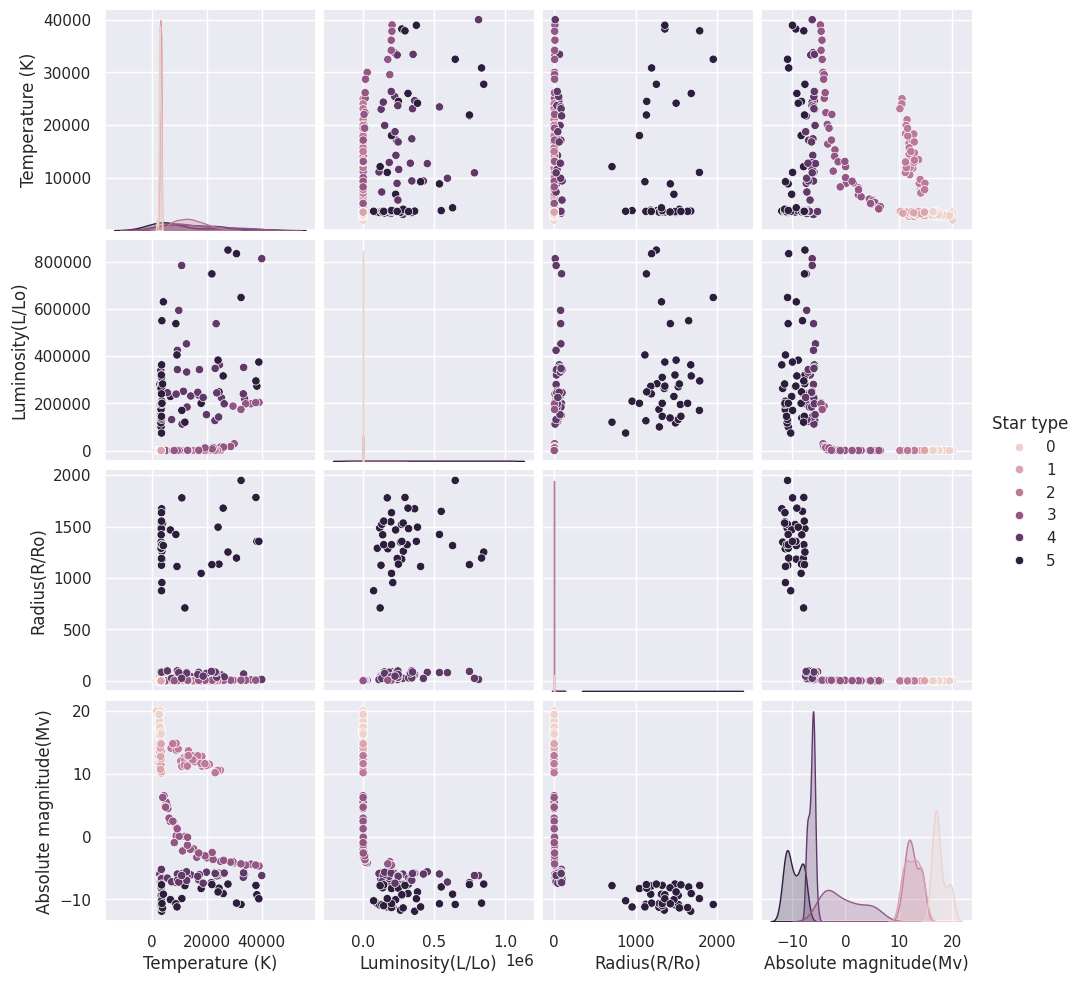

In [ ]:
sns.pairplot(df, hue='Star type')
plt.show()

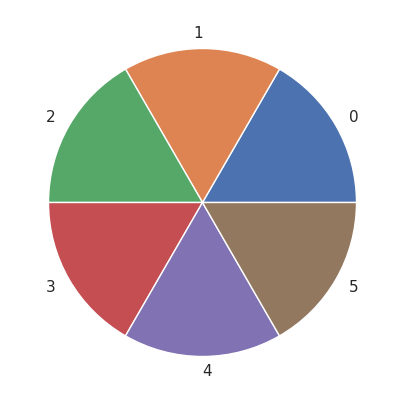

In [ ]:
y =df['Star type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
X = df.drop(columns=['Star type'])
X.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
5,2840,0.000650,0.1100,16.98
6,2637,0.000730,0.1270,17.22
7,2600,0.000400,0.0960,17.40
8,2650,0.000690,0.1100,17.45
9,2700,0.000180,0.1300,16.05


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity(L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius(R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude(Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06


In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,-0.779382,-0.598624,-0.459210,1.116745
1,-0.782110,-0.598624,-0.459241,1.162414
2,-0.828477,-0.598624,-0.459342,1.362213
3,-0.807496,-0.598624,-0.459229,1.167171
4,-0.897819,-0.598624,-0.459340,1.491607
5,-0.803300,-0.598624,-0.459326,1.198568
6,-0.824596,-0.598624,-0.459293,1.221402
7,-0.828477,-0.598624,-0.459353,1.238528
8,-0.823232,-0.598624,-0.459326,1.243285
9,-0.817987,-0.598624,-0.459287,1.110085


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,-1.480297e-17,1.00209,-0.897819,-0.750402,-0.495301,0.478157,3.094941
Luminosity(L/Lo),240.0,2.960595e-17,1.00209,-0.598624,-0.598624,-0.598623,0.507442,4.145201
Radius(R/Ro),240.0,-1.572816e-17,1.00209,-0.459523,-0.459340,-0.458062,-0.376703,3.316058
Absolute magnitude(Mv),240.0,-3.885781e-17,1.00209,-1.551051,-1.009928,0.373968,0.886263,1.491607


In [ ]:
observations = list(df.index)
variables = list(df.columns)

<ipython-input-16-4e6743a6f098>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


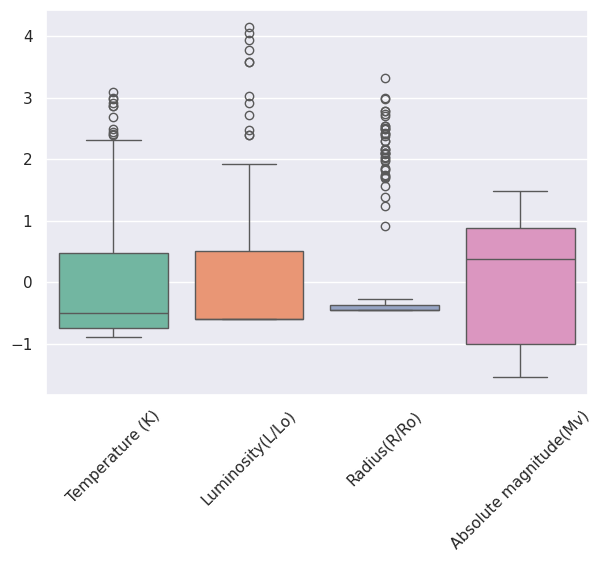

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-17-1b1c93c49b26>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


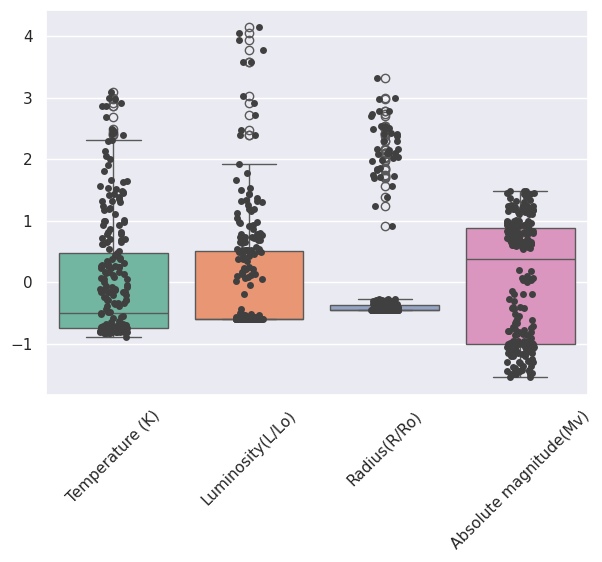

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

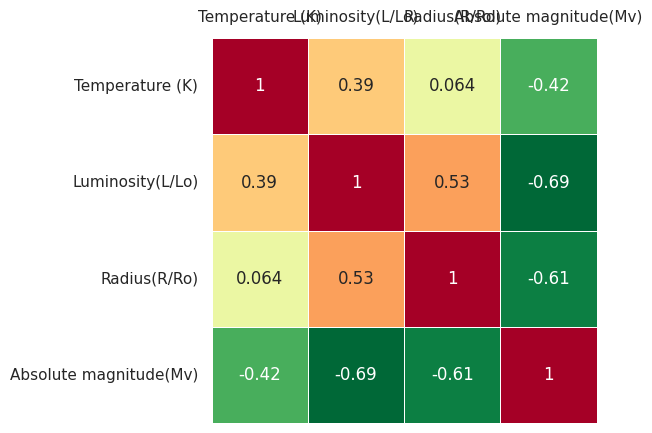

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, '$Z_2$')

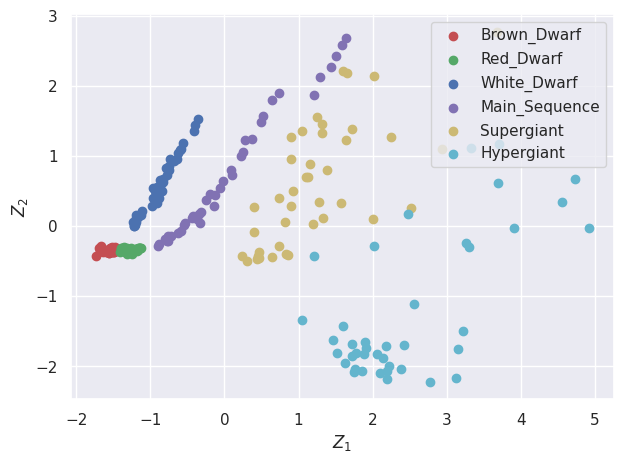

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Brown_Dwarf = np.where(y == 0)
idx_Red_Dwarf = np.where(y == 1)
idx_White_Dwarf = np.where(y == 2)
idx_Main_Sequence = np.where(y == 3)
idx_Supergiant = np.where(y == 4)
idx_Hypergiant = np.where(y == 5)

plt. figure()
plt.scatter(Z[idx_Brown_Dwarf,0], Z[idx_Brown_Dwarf,1], c='r', label='Brown_Dwarf')
plt.scatter(Z[idx_Red_Dwarf,0], Z[idx_Red_Dwarf,1], c='g', label='Red_Dwarf')
plt.scatter(Z[idx_White_Dwarf,0], Z[idx_White_Dwarf,1], c='b', label='White_Dwarf')
plt.scatter(Z[idx_Main_Sequence,0], Z[idx_Main_Sequence,1], c='m', label='Main_Sequence')
plt.scatter(Z[idx_Supergiant,0], Z[idx_Supergiant,1], c='y', label='Supergiant')
plt.scatter(Z[idx_Hypergiant,0], Z[idx_Hypergiant,1], c='c', label='Hypergiant')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

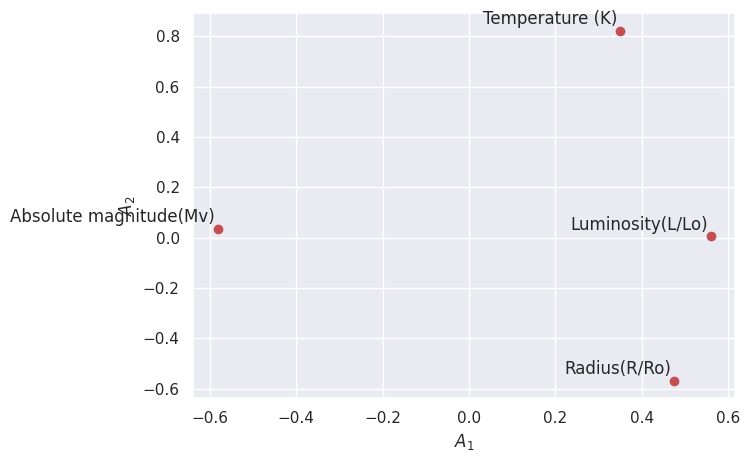

In [ ]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

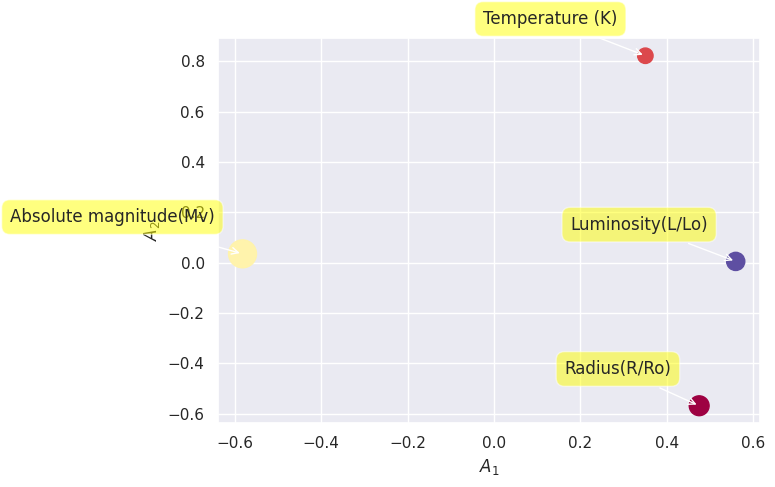

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

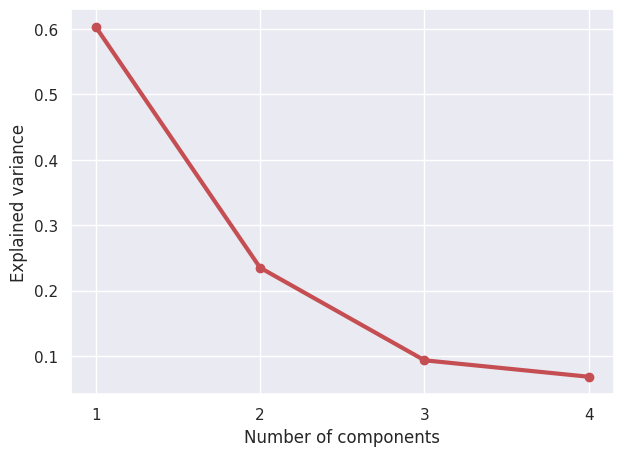

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

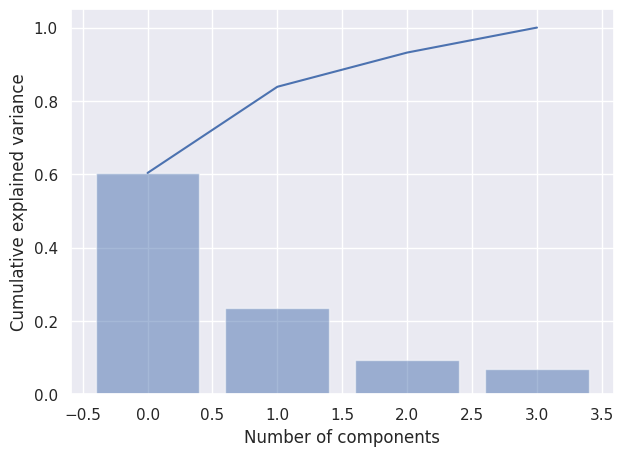

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

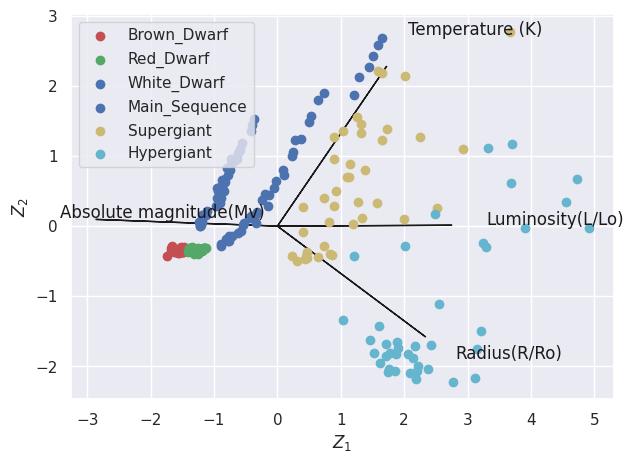

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Brown_Dwarf,0], Z[idx_Brown_Dwarf,1], c='r', label='Brown_Dwarf')
plt.scatter(Z[idx_Red_Dwarf,0], Z[idx_Red_Dwarf,1], c='g', label='Red_Dwarf')
plt.scatter(Z[idx_White_Dwarf,0], Z[idx_White_Dwarf,1], c='b', label='White_Dwarf')
plt.scatter(Z[idx_Main_Sequence,0], Z[idx_Main_Sequence,1], c='b', label='Main_Sequence')
plt.scatter(Z[idx_Supergiant,0], Z[idx_Supergiant,1], c='y', label='Supergiant')
plt.scatter(Z[idx_Hypergiant,0], Z[idx_Hypergiant,1], c='c', label='Hypergiant')
plt.legend(loc='upper left')

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
out['PC']

,PC1,PC2,PC3,PC4
0,-1.476090,-0.343211,0.157901,0.319705
1,-1.503654,-0.343857,0.161887,0.355995
2,-1.636288,-0.374996,0.192258,0.506282
3,-1.515309,-0.364557,0.171735,0.353587
4,-1.735919,-0.427500,0.226676,0.593937
...,...,...,...,...
235,3.703168,1.177682,-1.237078,1.029830
236,4.729798,0.667365,1.182107,1.515115
237,3.211102,-1.489990,0.562704,0.552412
238,2.553545,-1.117109,0.305920,0.025264


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (60.3% expl.var)', ylabel='PC2 (23.5% expl.var)'>)

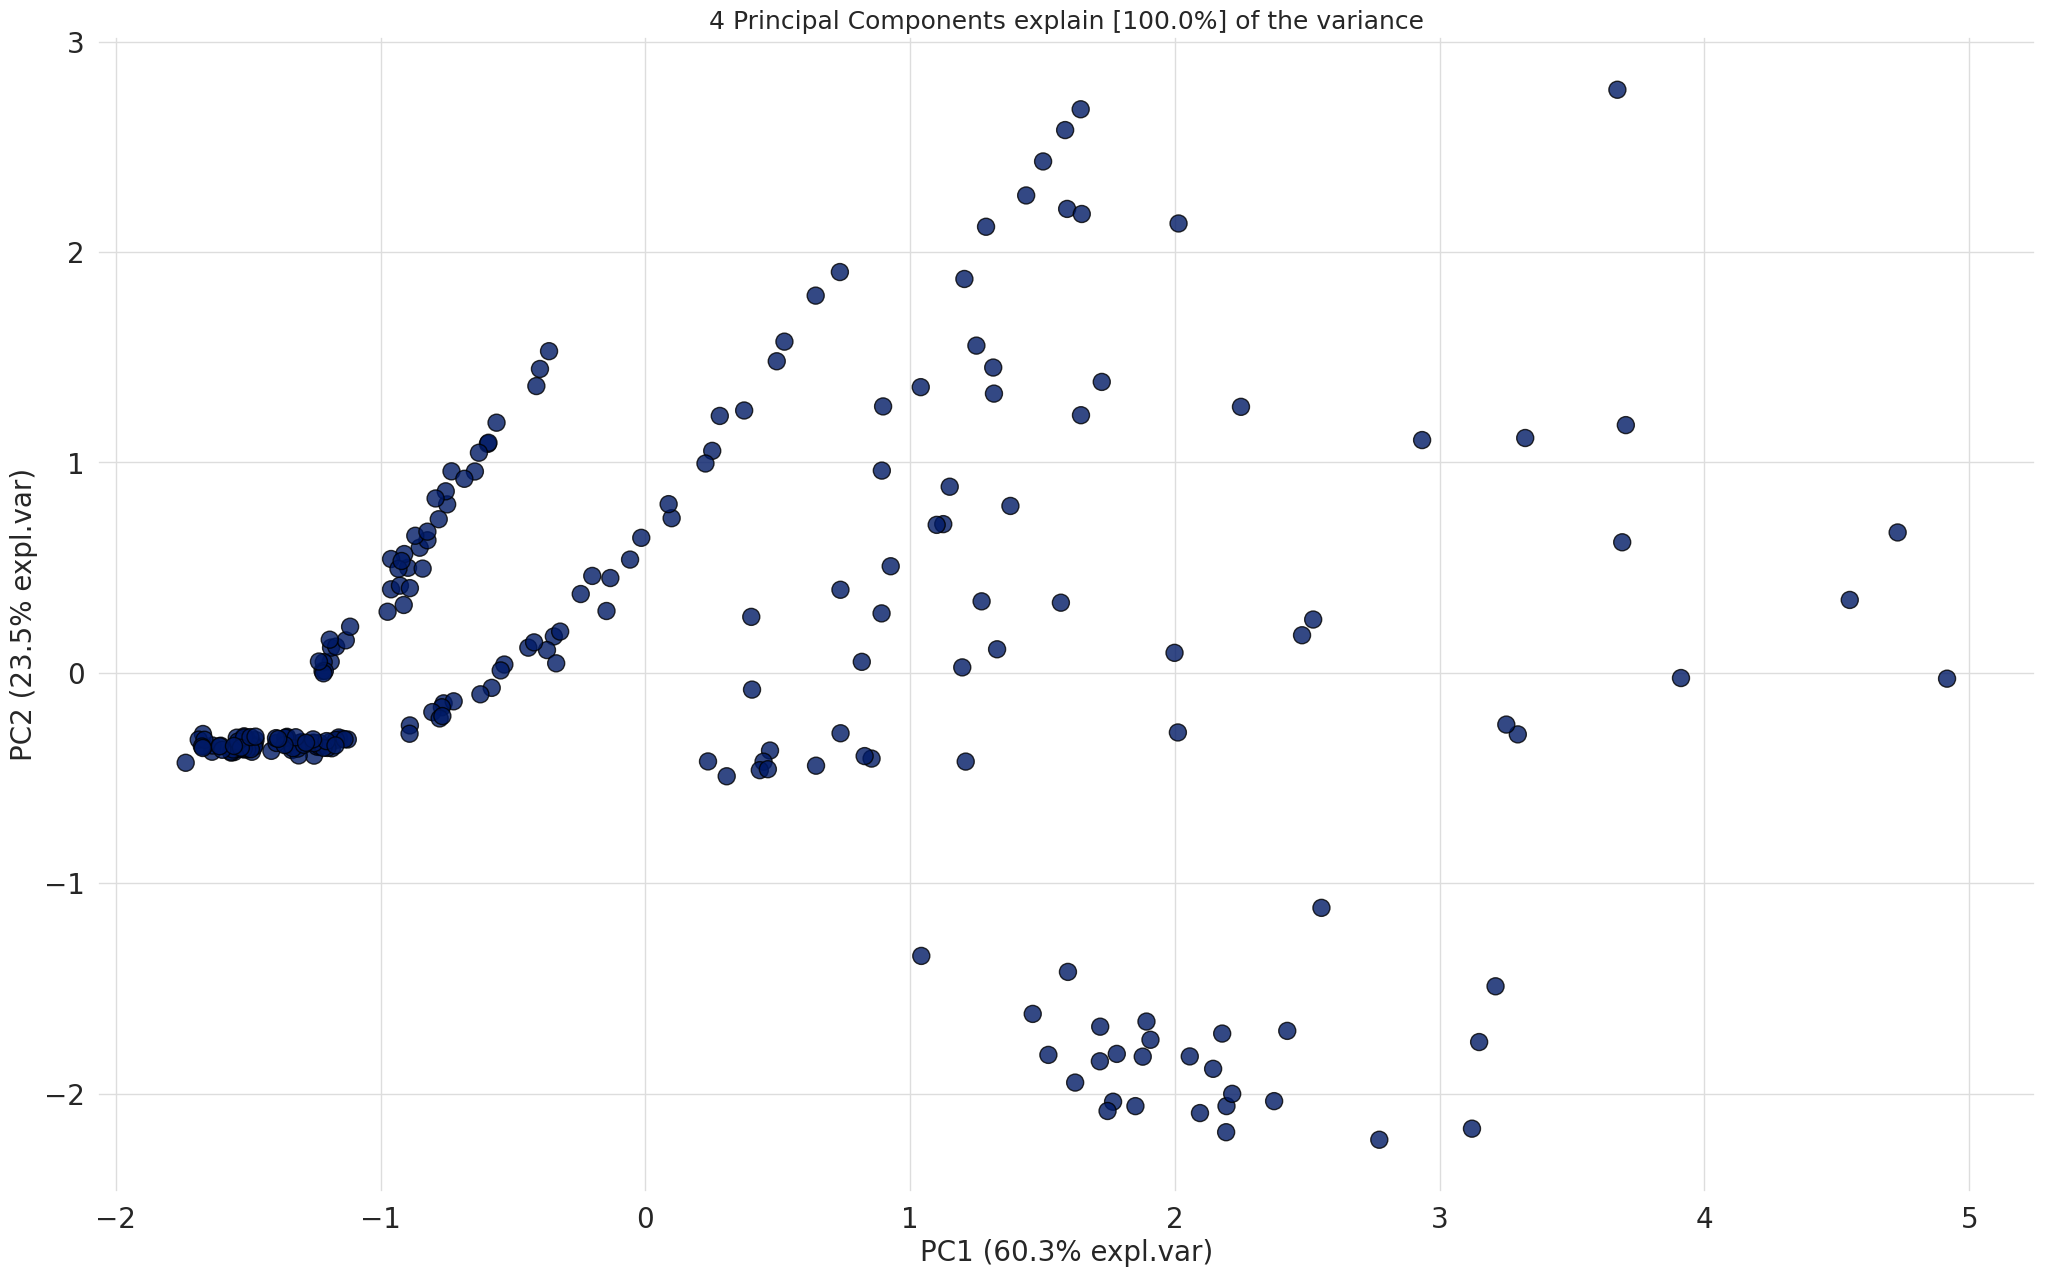

In [ ]:
model.scatter(label=True, legend=False)

In [ ]:
A = out['loadings'].T

<ipython-input-28-da59a7d9feff>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],


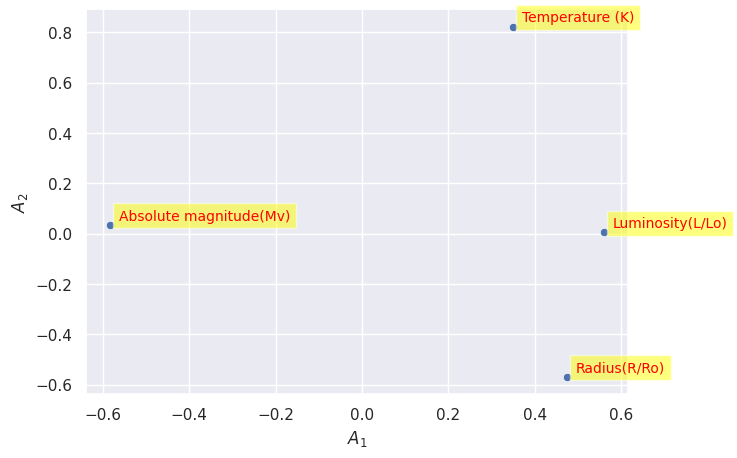

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

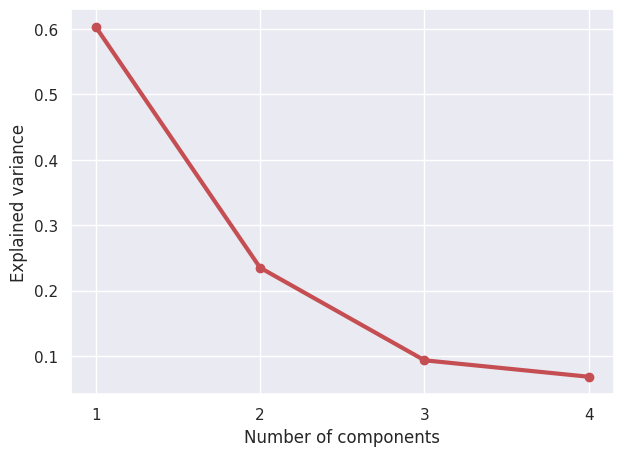

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

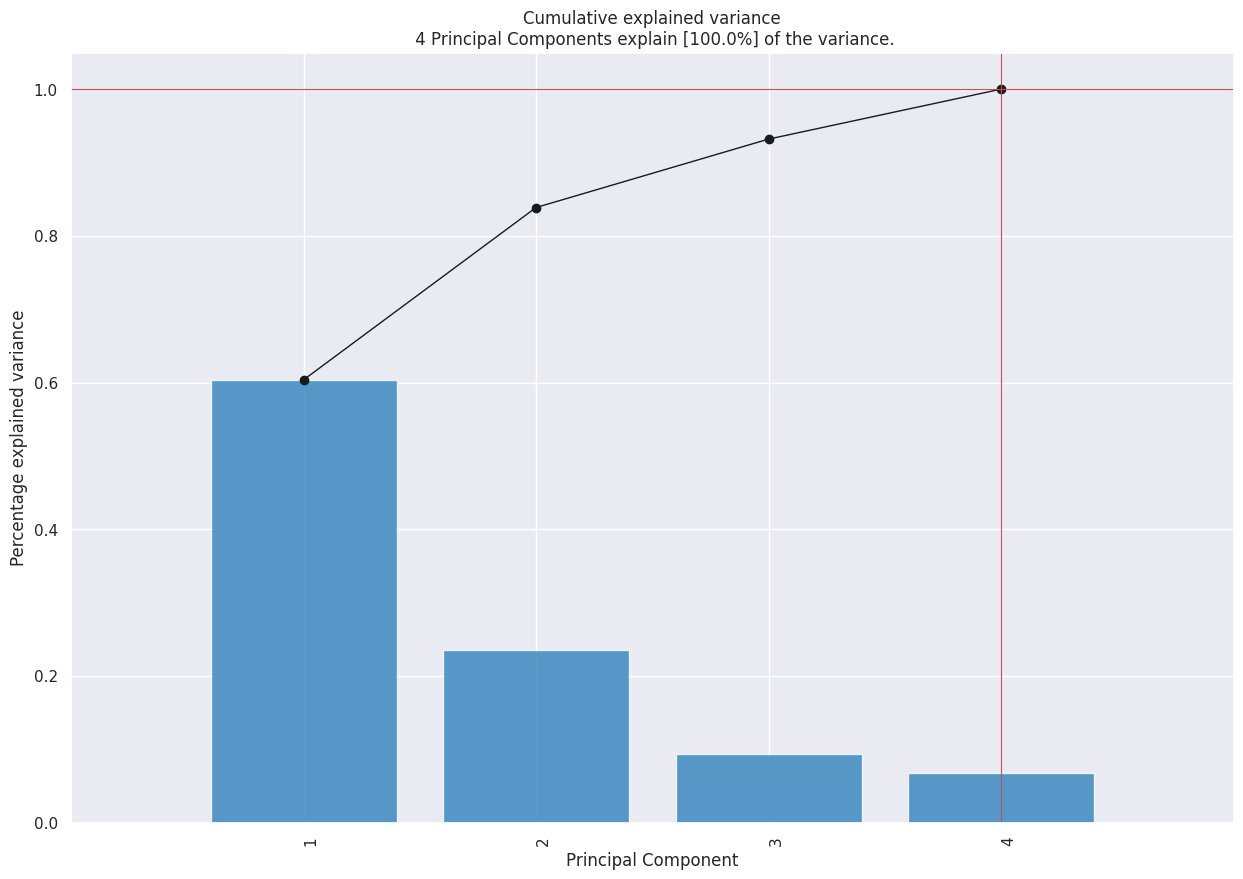

In [ ]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (60.3% expl.var)', ylabel='PC2 (23.5% expl.var)'>)

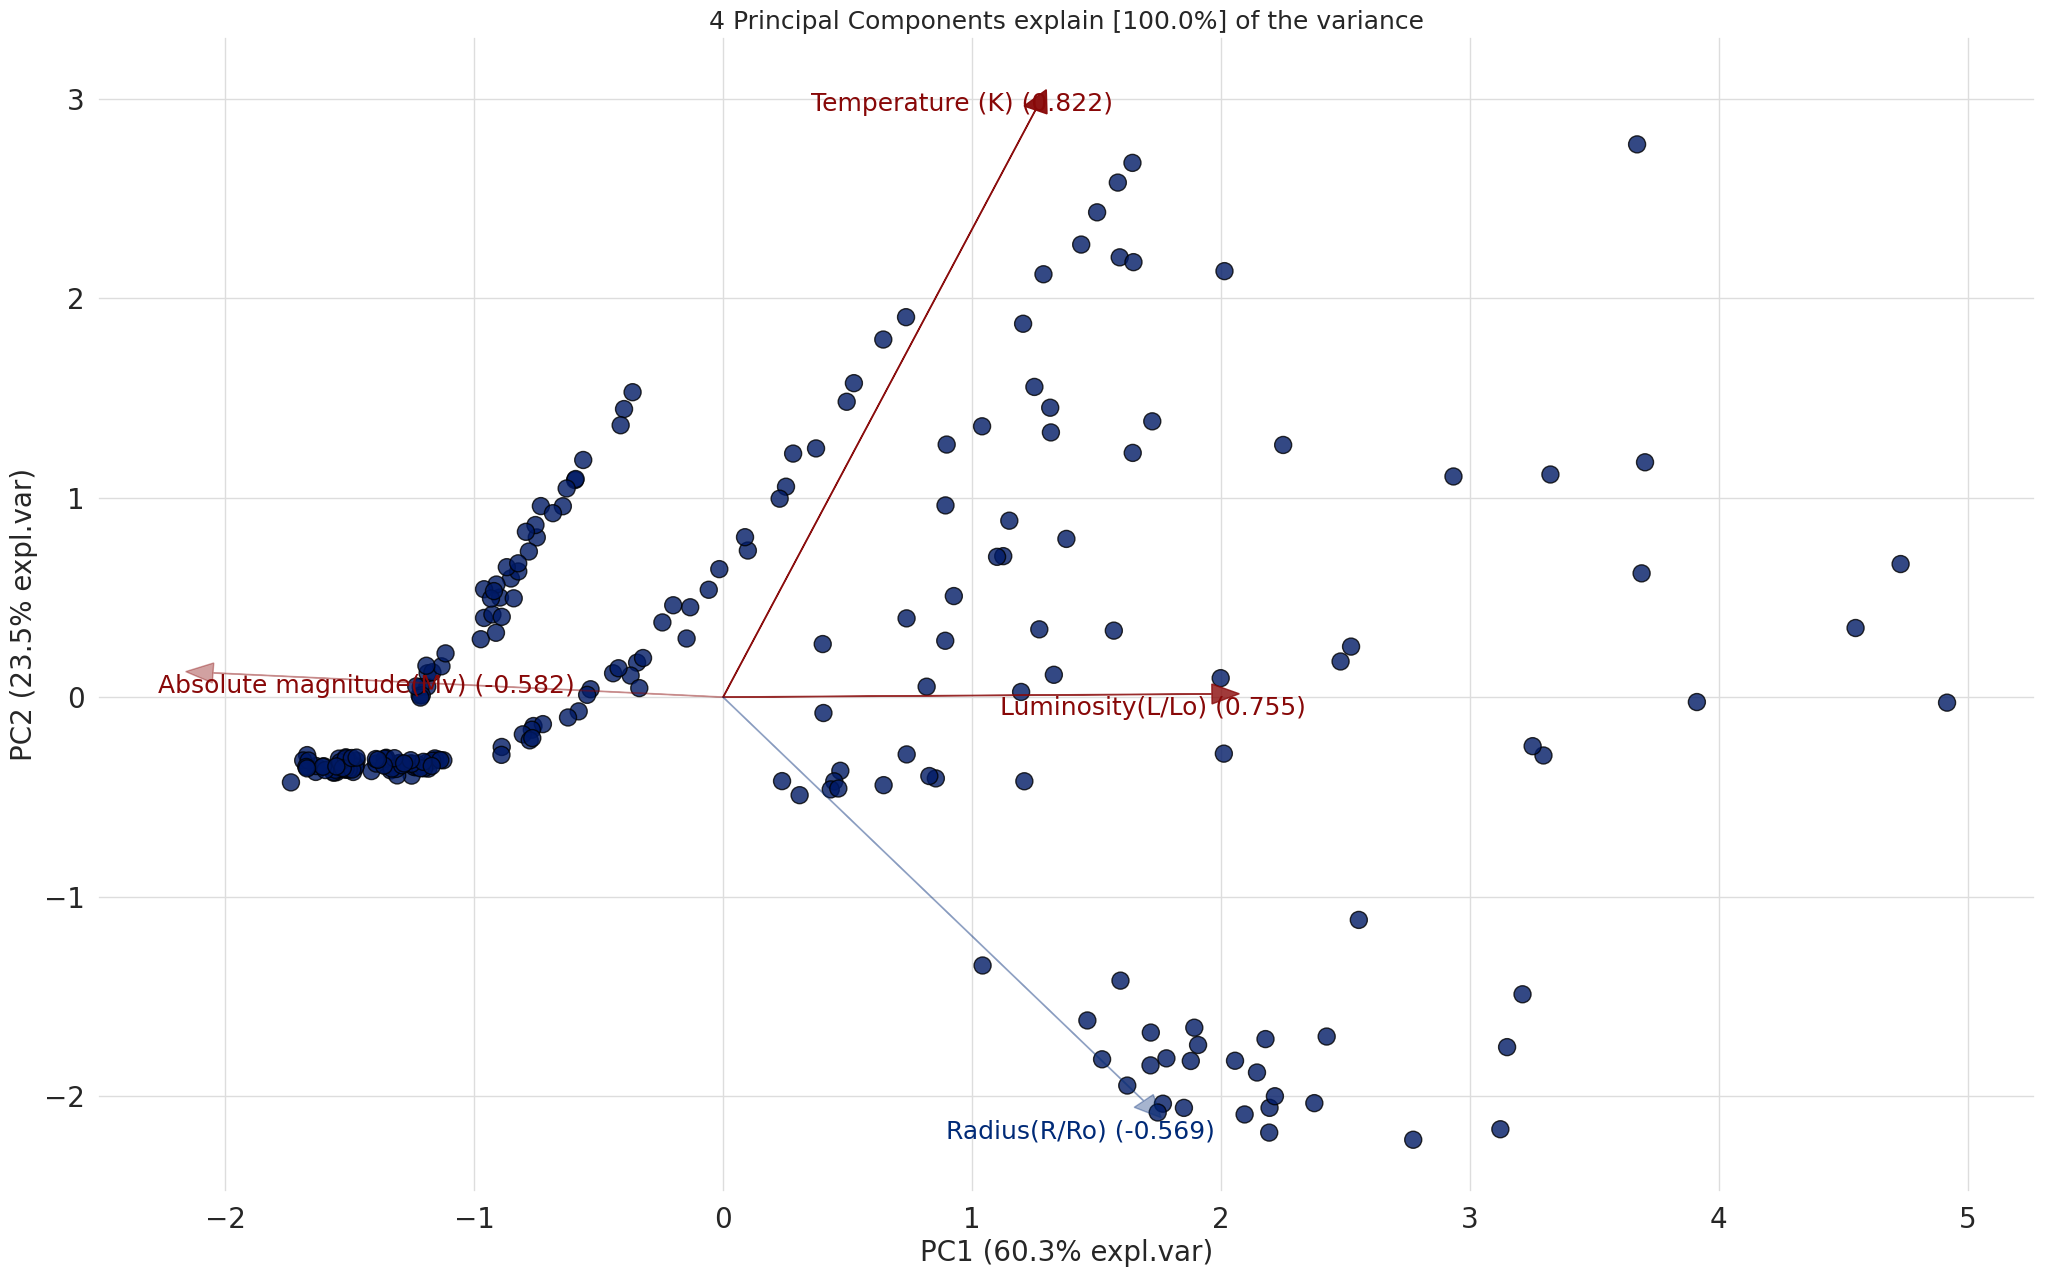

In [ ]:
model.biplot(label=False, legend=False)

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

[ ]


data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (216, 5)
Unseen Data For Predictions: (24, 5)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Star type', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Star type
2,Target type,Multiclass
3,Original data shape,"(216, 5)"
4,Transformed data shape,"(216, 5)"
5,Transformed train set shape,"(151, 5)"
6,Transformed test set shape,"(65, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3330
lda,Linear Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0290
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1600
lightgbm,Light Gradient Boosting Machine,0.9938,1.0000,0.9938,0.9953,0.9932,0.9924,0.9929,1.0730
dt,Decision Tree Classifier,0.9933,0.9958,0.9933,0.9950,0.9927,0.9919,0.9924,0.0340
gbc,Gradient Boosting Classifier,0.9933,0.0000,0.9933,0.9956,0.9933,0.9920,0.9925,0.4900
qda,Quadratic Discriminant Analysis,0.9804,0.0000,0.9804,0.9853,0.9786,0.9762,0.9777,0.0560
xgboost,Extreme Gradient Boosting,0.9804,1.0000,0.9804,0.9858,0.9796,0.9763,0.9778,0.0880
lr,Logistic Regression,0.9338,0.0000,0.9338,0.9559,0.9310,0.9202,0.9257,1.2550
nb,Naive Bayes,0.8408,0.9910,0.8408,0.8892,0.8310,0.8085,0.8203,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8235,0.9874,0.8235,0.9118,0.8176,0.7875,0.8115
2,0.8824,0.9874,0.8824,0.9294,0.8676,0.8583,0.8730
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8824,0.9880,0.8824,0.9020,0.8824,0.8589,0.8625
5,0.8824,0.9961,0.8824,0.8971,0.8807,0.8583,0.8619
6,0.8235,0.9874,0.8235,0.8382,0.8179,0.7866,0.7899
7,0.9412,1.0000,0.9412,0.9559,0.9395,0.9292,0.9331
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9333,0.9583,0.9333,0.9500,0.9270,0.9189,0.9240
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9333,0.9583,0.9333,0.9500,0.9270,0.9189,0.9240
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5625,0.9100,0.5625,0.4688,0.5000,0.4717,0.4931
1,0.5333,0.9066,0.5333,0.5000,0.5067,0.4385,0.4432
2,0.5333,0.9359,0.5333,0.5200,0.4651,0.4503,0.4836
3,0.6667,0.9188,0.6667,0.7444,0.6556,0.6032,0.6196
4,0.6000,0.8857,0.6000,0.6222,0.6000,0.5213,0.5269
5,0.5333,0.8985,0.5333,0.5333,0.5143,0.4385,0.4457
6,0.5333,0.9139,0.5333,0.4222,0.4456,0.4324,0.4580
7,0.5333,0.8536,0.5333,0.5889,0.5000,0.4503,0.4726
8,0.5333,0.9353,0.5333,0.5778,0.5365,0.4355,0.4402


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5625,0.8757,0.5625,0.3188,0.4062,0.4615,0.5057
1,0.6000,0.8385,0.6000,0.4889,0.5352,0.5109,0.5225
2,0.6000,0.9081,0.6000,0.5033,0.5246,0.5055,0.5236
3,0.7333,0.8910,0.7333,0.7222,0.7143,0.6774,0.6848
4,0.7333,0.9038,0.7333,0.7778,0.7333,0.6809,0.6882
5,0.6000,0.9295,0.6000,0.6533,0.5278,0.5213,0.5577
6,0.6667,0.8568,0.6667,0.6778,0.6476,0.5989,0.6087
7,0.5333,0.7885,0.5333,0.5889,0.5000,0.4503,0.4726
8,0.4000,0.8024,0.4000,0.3422,0.3429,0.2932,0.3113


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,0.0000,0.9375,0.9531,0.9315,0.9242,0.9286
1,0.9333,0.0000,0.9333,0.9556,0.9333,0.9198,0.9247
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9333,0.0000,0.9333,0.9500,0.9314,0.9194,0.9243
5,0.9333,0.0000,0.9333,0.9500,0.9314,0.9194,0.9243
6,0.9333,0.0000,0.9333,0.9556,0.9333,0.9198,0.9247
7,0.8667,0.0000,0.8667,0.9111,0.8667,0.8404,0.8495
8,0.8000,0.0000,0.8000,0.8833,0.7825,0.7594,0.7804


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,0.0000,0.9375,0.9531,0.9315,0.9242,0.9286
1,0.9333,0.0000,0.9333,0.9556,0.9333,0.9198,0.9247
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9333,0.0000,0.9333,0.9500,0.9314,0.9194,0.9243
5,0.9333,0.0000,0.9333,0.9500,0.9314,0.9194,0.9243
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9333,0.0000,0.9333,0.9556,0.9333,0.9198,0.9247
8,0.8667,0.0000,0.8667,0.9056,0.8603,0.8387,0.8479


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lr

LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.0000,0.9412,0.9559,0.9395,0.9292,0.9331
1,0.9412,0.0000,0.9412,0.9559,0.9395,0.9292,0.9331
2,0.8235,0.0000,0.8235,0.8725,0.8025,0.7884,0.8018
3,0.8824,0.0000,0.8824,0.9167,0.8807,0.8589,0.8661
4,0.9412,0.0000,0.9412,0.9608,0.9412,0.9295,0.9333
5,0.9412,0.0000,0.9412,0.9559,0.9395,0.9292,0.9331
6,0.7647,0.0000,0.7647,0.8588,0.7353,0.7167,0.7418
7,0.8824,0.0000,0.8824,0.9294,0.8676,0.8583,0.8730
8,0.9375,0.0000,0.9375,0.9583,0.9375,0.9249,0.9292


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
clf_pca = setup(data=df, target='Star type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,123
1,Target,Star type
2,Target type,Multiclass
3,Original data shape,"(240, 5)"
4,Transformed data shape,"(240, 3)"
5,Transformed train set shape,"(168, 3)"
6,Transformed test set shape,"(72, 3)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9706,0.0000,0.9706,0.9802,0.9705,0.9646,0.9669,0.0380
knn,K Neighbors Classifier,0.9702,0.9990,0.9702,0.9799,0.9702,0.9641,0.9665,0.0580
rf,Random Forest Classifier,0.9408,0.9937,0.9408,0.9590,0.9390,0.9287,0.9335,0.3640
et,Extra Trees Classifier,0.9401,0.9965,0.9401,0.9541,0.9393,0.9278,0.9306,0.2730
lightgbm,Light Gradient Boosting Machine,0.9287,0.9937,0.9287,0.9407,0.9288,0.9142,0.9167,0.9020
gbc,Gradient Boosting Classifier,0.9158,0.0000,0.9158,0.9378,0.9171,0.8989,0.9033,0.5600
lda,Linear Discriminant Analysis,0.8993,0.0000,0.8993,0.9323,0.8921,0.8789,0.8874,0.0390
xgboost,Extreme Gradient Boosting,0.8875,0.9870,0.8875,0.9097,0.8871,0.8646,0.8695,0.1560
lr,Logistic Regression,0.8812,0.0000,0.8812,0.9084,0.8772,0.8570,0.8638,0.0510
dt,Decision Tree Classifier,0.8688,0.9213,0.8688,0.8912,0.8641,0.8418,0.8474,0.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.0000,0.9412,0.9559,0.9395,0.9292,0.9331
1,0.8824,0.0000,0.8824,0.9294,0.8853,0.8583,0.8693
2,0.8824,0.0000,0.8824,0.9412,0.8725,0.8595,0.8740
3,0.8824,0.0000,0.8824,0.9167,0.8807,0.8589,0.8661
4,0.9412,0.0000,0.9412,0.9608,0.9412,0.9295,0.9333
5,0.9412,0.0000,0.9412,0.9559,0.9395,0.9292,0.9331
6,0.7647,0.0000,0.7647,0.8992,0.7529,0.7167,0.7554
7,0.8824,0.0000,0.8824,0.9294,0.8676,0.8583,0.8730
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8824,0.9937,0.8824,0.9294,0.8853,0.8583,0.8693
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9412,1.0000,0.9412,0.9559,0.9395,0.9292,0.9331
4,0.9412,0.9959,0.9412,0.9608,0.9412,0.9295,0.9333
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8235,0.9874,0.8235,0.9118,0.8176,0.7875,0.8115
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9412,1.0000,0.9412,0.9559,0.9395,0.9292,0.9331
4,0.9412,0.9919,0.9412,0.9608,0.9412,0.9295,0.9333
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8235,0.9622,0.8235,0.9118,0.8176,0.7875,0.8115
2,0.9412,1.0000,0.9412,0.9559,0.9395,0.9292,0.9331
3,0.9412,1.0000,0.9412,0.9559,0.9395,0.9292,0.9331
4,0.8824,0.9880,0.8824,0.9020,0.8824,0.8589,0.8625
5,0.9412,0.9961,0.9412,0.9559,0.9356,0.9289,0.9328
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9412,1.0000,0.9412,0.9559,0.9395,0.9292,0.9331
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8235,0.9874,0.8235,0.9118,0.8176,0.7875,0.8115
2,0.8824,0.9874,0.8824,0.9294,0.8676,0.8583,0.8730
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8824,0.9880,0.8824,0.9020,0.8824,0.8589,0.8625
5,0.8824,0.9961,0.8824,0.8971,0.8807,0.8583,0.8619
6,0.8235,0.9874,0.8235,0.8382,0.8179,0.7866,0.7899
7,0.9412,1.0000,0.9412,0.9559,0.9395,0.9292,0.9331
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

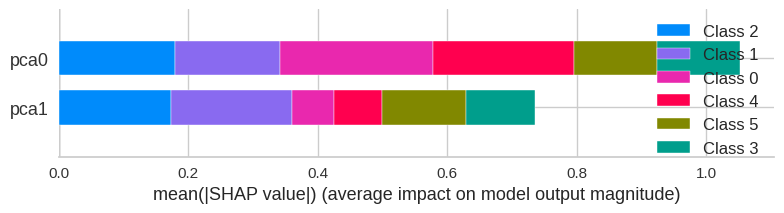

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')